In [ ]:
# Gradient Boosting Machine

# Importing the libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy import stats

In [ ]:
# Importing the dataset

dataset = pd.read_csv('all13.csv')
X = dataset.iloc[:,15:-1]
Y = dataset.iloc[:,25]
print(X)

      MILLING_CODE  IRI PREVIOUS  TIME PASSED SINCE LAST REHABILITATION  \
0                0          1.04                                   0.28   
1                0          0.77                                   4.31   
2                0          0.82                                   7.78   
3                0          0.81                                   9.24   
4                0          0.84                                  10.22   
...            ...           ...                                    ...   
2715             0          0.74                                   2.82   
2716             0          0.75                                   3.93   
2717             0          0.75                                   4.86   
2718             0          0.85                                   8.04   
2719             0          0.98                                   8.91   

      TOTAL_THICKNESS  OVERLAY_THICKNESS  TEMP_AVG  FREEZE_INDEX  \
0               553.8          

In [ ]:
dataset.head()

,VISIT_NO,STATE_CODE,STATE_CODE_EXP,SHRP_ID,CONSTRUCTION_NO,VISIT_DATE,YEAR,MERRA_ID,IMP_DATE,IMP_TYPE_EXP,...,IRI PREVIOUS,TIME PASSED SINCE LAST REHABILITATION,TOTAL_THICKNESS,OVERLAY_THICKNESS,TEMP_AVG,FREEZE_INDEX,PRECIPITATION,NUMBER OF PRESERVATION ACTIVITIES,EXTREME DECREASE,IRI
0,1050202,1,Alabama,502,2,4/1/1992,1992,133784,12/20/1991,Hot-Mix Recycled Asphalt Concrete Overlay,...,1.04,0.28,553.8,48.3,18,0,1439,0,1,0.77
1,1050204,1,Alabama,502,2,4/11/1996,1996,133784,12/20/1991,Hot-Mix Recycled Asphalt Concrete Overlay,...,0.77,4.31,553.8,48.3,18,15,1394,0,0,0.82
2,1050205,1,Alabama,502,2,9/29/1999,1999,133784,12/20/1991,Hot-Mix Recycled Asphalt Concrete Overlay,...,0.82,7.78,553.8,48.3,20,4,912,0,0,0.81
3,1050206,1,Alabama,502,2,3/13/2001,2001,133784,12/20/1991,Hot-Mix Recycled Asphalt Concrete Overlay,...,0.81,9.24,553.8,48.3,19,1,1061,0,0,0.84
4,1050207,1,Alabama,502,2,3/8/2002,2002,133784,12/20/1991,Hot-Mix Recycled Asphalt Concrete Overlay,...,0.84,10.22,553.8,48.3,20,0,1283,0,0,0.84


In [ ]:
X.describe()

,MILLING_CODE,IRI PREVIOUS,TIME PASSED SINCE LAST REHABILITATION,TOTAL_THICKNESS,OVERLAY_THICKNESS,TEMP_AVG,FREEZE_INDEX,PRECIPITATION,NUMBER OF PRESERVATION ACTIVITIES,EXTREME DECREASE
count,2720.000000,2720.000000,2720.000000,2720.000000,2720.000000,2720.000000,2720.000000,2720.000000,2720.000000,2720.000000
mean,0.560662,1.141838,7.247614,670.389632,61.142279,13.583088,308.409191,907.692647,1.047794,0.127574
std,0.496398,0.493858,5.192386,265.134566,31.935831,6.452794,455.999664,475.735804,1.051066,0.333676
min,0.000000,0.410000,0.000000,203.200000,2.500000,2.000000,0.000000,12.000000,0.000000,0.000000
25%,0.000000,0.820000,2.890000,505.400000,40.600000,8.000000,0.000000,581.500000,0.000000,0.000000
50%,1.000000,1.030000,6.760000,631.100000,50.800000,13.000000,65.000000,912.000000,1.000000,0.000000
75%,1.000000,1.320000,10.792500,820.400000,71.100000,19.000000,442.000000,1287.250000,1.000000,0.000000
max,1.000000,5.670000,27.330000,2578.100000,177.800000,25.000000,2018.000000,2386.000000,8.000000,1.000000


In [ ]:
Y.describe()

count    2720.000000
mean        1.093908
std         0.427568
min         0.410000
25%         0.810000
50%         1.010000
75%         1.280000
max         4.070000
Name: IRI, dtype: float64

In [ ]:
print(Y)

0       0.77
1       0.82
2       0.81
3       0.84
4       0.84
        ... 
2715    0.75
2716    0.75
2717    0.85
2718    0.98
2719    0.99
Name: IRI, Length: 2720, dtype: float64


In [ ]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state =47)
x2 = X_train.copy()
ds1 = pd.DataFrame(data=x2)
ds1['IRIF'] = list(Y_train)

params = {
    "n_estimators":2000,
    "max_depth":5,
    "min_samples_split": 25,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train,Y_train)
Y_pred= reg.predict(X_test)

R2=r2_score(Y_test, Y_pred)
MSE = mean_squared_error(Y_test, Y_pred)
RMSE = math.sqrt(MSE)
print("R2:\n", round(R2,3))
print("\n")
print("Root Mean Square Error:\n", round(RMSE,3))
print("\n")
print("Mean Square Error:\n", round(MSE,3))

R2:
 0.922


Root Mean Square Error:
 0.119


Mean Square Error:
 0.014


In [1]:
#GBM-Hyper Parameters

params = {
    "n_estimators":2000,
    "max_depth":5,
    "min_samples_split": 25,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [ ]:
# Fitting Regressor

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train,Y_train)
Y_pred= reg.predict(X_test)

In [ ]:
# R2 & RMSE

R2=r2_score(Y_test, Y_pred)
MSE = mean_squared_error(Y_test, Y_pred)
RMSE = math.sqrt(MSE)
print("R2:\n", round(R2,3))
print("\n")
print("Root Mean Square Error:\n", round(RMSE,3))
print("\n")
print("Mean Square Error:\n", round(MSE,3))

In [ ]:
#K-Fold Cross Validation

features = dataset.iloc[:,11:-1]
labels = dataset.iloc[:, 21]

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

num_folds = 10
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state =5)
params = {
    "n_estimators":1000,
    "max_depth":5,
    "min_samples_split": 3,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
reg2 = ensemble.GradientBoostingRegressor(**params)
reg2.fit(X_train,Y_train)

kfold = KFold(n_splits=num_folds )

scores = cross_val_score(reg2, X,Y, cv=kfold)
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())

KeyboardInterrupt: ignored

In [ ]:
# Correlation Matrix

matrix = ds1.corr()
matrix

,MILLING_CODE,IRI PREVIOUS,TIME PASSED SINCE LAST REHABILITATION,TOTAL_THICKNESS,OVERLAY_THICKNESS,TEMP_AVG,FREEZE_INDEX,PRECIPITATION,NUMBER OF PRESERVATION ACTIVITIES,EXTREME DECREASE,IRIF
MILLING_CODE,1.000000,-0.131530,0.069017,0.097743,0.204381,0.293635,-0.206405,-0.109754,0.077688,-0.001610,-0.164688
IRI PREVIOUS,-0.131530,1.000000,-0.070673,-0.092672,-0.055229,-0.158576,0.154878,-0.089785,0.057416,0.428017,0.639140
TIME PASSED SINCE LAST REHABILITATION,0.069017,-0.070673,1.000000,0.100589,0.048000,0.160090,-0.108312,0.035023,0.308997,-0.466791,0.277601
TOTAL_THICKNESS,0.097743,-0.092672,0.100589,1.000000,-0.040322,0.004396,-0.010826,0.241398,-0.130365,-0.055765,-0.098535
OVERLAY_THICKNESS,0.204381,-0.055229,0.048000,-0.040322,1.000000,-0.052529,0.043944,-0.399418,0.192469,-0.069773,-0.056438
TEMP_AVG,0.293635,-0.158576,0.160090,0.004396,-0.052529,1.000000,-0.828039,-0.061919,-0.017341,0.009735,-0.165506
FREEZE_INDEX,-0.206405,0.154878,-0.108312,-0.010826,0.043944,-0.828039,1.000000,-0.067357,0.031357,-0.023856,0.158985
PRECIPITATION,-0.109754,-0.089785,0.035023,0.241398,-0.399418,-0.061919,-0.067357,1.000000,-0.121363,0.062772,-0.128853
NUMBER OF PRESERVATION ACTIVITIES,0.077688,0.057416,0.308997,-0.130365,0.192469,-0.017341,0.031357,-0.121363,1.000000,-0.143805,0.183003
EXTREME DECREASE,-0.001610,0.428017,-0.466791,-0.055765,-0.069773,0.009735,-0.023856,0.062772,-0.143805,1.000000,-0.178244


In [ ]:
# IRI Predicted

x1 = X_test.copy()
ds2 = pd.DataFrame(data=x1)
ds2['IRIF'] = list(Y_pred)
ds2.to_csv('IRI_Predicted.csv')

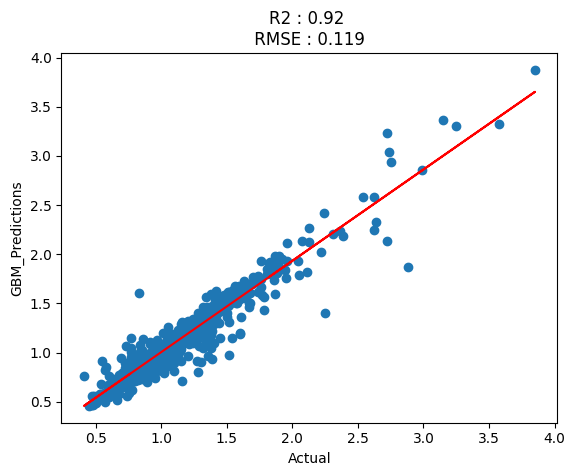

In [ ]:
# Plot

slope, intercept, r, p, std_err = stats.linregress(Y_test, Y_pred)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, Y_test))

plt.scatter(Y_test, Y_pred)
plt.plot(Y_test, mymodel, color = "r")
plt.title(f"R2 : {round(R2,2)} \n RMSE : {round(RMSE,3)} ")
plt.xlabel("Actual")
plt.ylabel("GBM_Predictions")
plt.show()